# Convergence of the empirical cdf

In [1]:
import IPython.html.widgets as widgets
from IPython.html.widgets import interact, interactive, fixed
import numpy as np
import seaborn as sns
import statsmodels.api as sm # recommended import according to the docs
import matplotlib.pyplot as plt
from scipy.stats import norm, cauchy, expon, gamma, uniform


import mpld3
mpld3.enable_notebook()

%matplotlib inline

:0: FutureWarning: IPython widgets are experimental and may change in the future.


## Glivenko Cantelli
Quand $N\rightarrow \infty$,
  \begin{equation*}
    ||\widehat F_N-F||_\infty\stackrel{p.s.}{\longrightarrow} 0
  \end{equation*}


In [2]:
def cdf(sample, x):
    n = sample.size
    nb = sum(sample <= x)
    return nb/float(n)

####Loi uniforme

La norme infinie entre la cdf théorique et empirique vaut 0.0997010202381


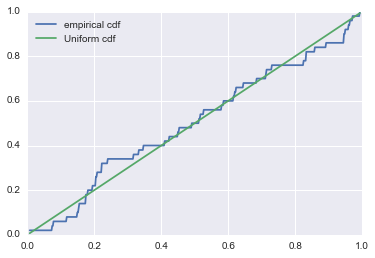

In [4]:
N = 50
sample = np.random.uniform(0, 1, N)
x= np.linspace(min(sample), max(sample), 10*N)
y = [cdf(sample, ele) for ele in x]
g = [uniform.cdf(ele) for ele in x]
plot1, =plt.plot(x,y, label = 'empirical cdf')
plot2, =plt.plot(x,g, label = 'Uniform cdf')
plt.legend(loc = 2)
diff = [abs(a - b) for a, b in zip(y,g)]
print 'La norme infinie entre la cdf théorique et empirique vaut {}'.format(max(diff))

####Loi Gaussienne

La norme infinie entre la cdf théorique et empirique vaut 0.0799291619293


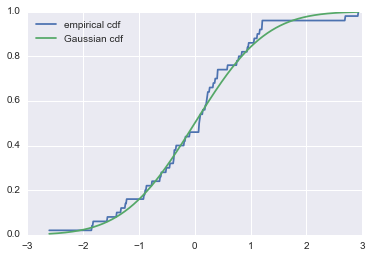

In [5]:
N = 50
sample = np.random.randn(N)
x= np.linspace(min(sample), max(sample), 10*N)
y = [cdf(sample, ele) for ele in x]
g = [norm.cdf(ele) for ele in x]
plt.plot(x,y, label = 'empirical cdf')
plt.plot(x,g, label = 'Gaussian cdf')
plt.legend(loc = 2)
diff = [abs(a - b) for a, b in zip(y,g)]
print 'La norme infinie entre la cdf théorique et empirique vaut {}'.format(max(diff))

####Loi de Cauchy 

La norme infinie entre la cdf théorique et empirique vaut 0.124709475499


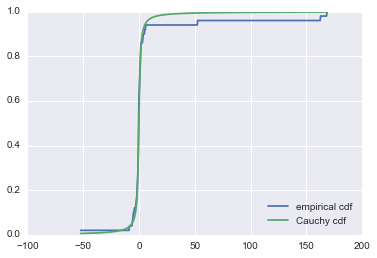

In [6]:
N = 50
sample = np.random.standard_cauchy(N)
x= np.linspace(min(sample), max(sample), 10*N)
y = [cdf(sample, ele) for ele in x]
g = [cauchy.cdf(ele) for ele in x]
plt.plot(x,y, label = 'empirical cdf')
plt.plot(x,g, label = 'Cauchy cdf')
plt.legend(loc = 4)
diff = [abs(a - b) for a, b in zip(y,g)]
print 'La norme infinie entre la cdf théorique et empirique vaut {}'.format(max(diff))

La norme infinie entre la cdf théorique et empirique vaut 0.0399482382128


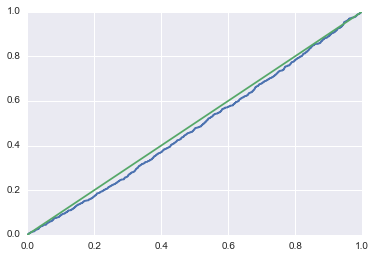

In [7]:
@interact(N=(50, 1000))
def generate(N):
    sample = np.random.uniform(0,1,N)
    x= np.linspace(min(sample), max(sample), 10*N)
    y = [cdf(sample, ele) for ele in x]
    g = [uniform.cdf(ele) for ele in x]
    plt.plot(x,y)
    plt.plot(x,g) 
    diff = [abs(a - b) for a, b in zip(y,g)]
    print 'La norme infinie entre la cdf théorique et empirique vaut {}'.format(max(diff))

###Construction d'intervalle de confiance pour la convergence ponctuelle
Pour tout $x\in\mathbb{R}$, quand $N\rightarrow \infty$,

$$\widehat F_N(x) \stackrel{p.s.}{\longrightarrow} F(x).$$
De plus, on a un controle des oscillation de $\widehat F_N(x)$ autour de  $F(x)$ par le TCL : quand $N\rightarrow \infty$, 
$$\widehat F_N(x) \approx F(x) + \frac{\sigma}{\sqrt{N}}\mathcal{N}(0,1)$$
où $\sigma^2=F(x)(1-F(x))$ ou (par Slutsky) $\sigma^2=\widehat F_N(x)(1-\widehat F_N(x))$.
On peut vérifier ce résultat en générant pour $j=1,\ldots,k$ un $N$-échantillons $(X_1^{(j)},\ldots,X_{N}^{(j)})$ et en en traçant un histogramme des valeurs 
$$\widehat F_N^{(j)}(x)=\frac{1}{N}\sum_{i=1}^N I(X_i^{(j)}<x), \mbox{ pour } j=1,\ldots,k$$ et en les comparant à la gaussienne $$\mathcal{N}\Big(F(x),\frac{\sigma^2}{n}\Big).$$

####Loi Gamma de paramètre $a$
$$f(x) \propto  x^{a-1}  exp(-x) I(x>0)$$

N=500, k=1000


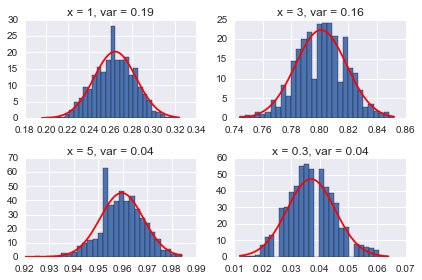

In [15]:
from scipy.stats import norm, gamma
#paramètres
a, k, N, bins = 2, 1000, 500, 30
print 'N={}, k={}'.format(N,k)
#données
for i, x in enumerate([0.3,1,3,5]):
    HatFx = []
    for j in range(k):
        data0 = gamma.rvs(a=a, size=N)
        HatFx.append(cdf(data0,x))
    #Gaussienne
    Fx = gamma.cdf(x, a=a)
    var = Fx*(1-Fx)
    X = np.linspace(min(HatFx), max(HatFx), 1000)
    y = norm.pdf(X, loc = Fx, scale = np.sqrt(var/float(N)))
    #plot
    ax = plt.subplot(2,2,i)
    plt.tight_layout()
    ax.hist(HatFx, bins = bins, normed = True)
    ax.plot(X, y, 'r')
    ax.set_title('x = {}, var = {}'.format(x, "%.2f" % var))
    



#plot
#plt.hist(HatFx, bins = 50, normed = True)
#plt.plot(X, y, 'r')
#plt.title('N={}, k={}, var = {}'.format(N,k, var))

##Comparaison de la cdf empirique $\widehat F_n$ et de $F_{\hat \theta_n}$ pour un estimateur $\hat\theta_n$ dans le modèle exponentiel

Soit $X_1,\ldots,X_n\stackrel{i.i.d.}{\sim} {\rm Exp}(\theta)$ pour un certain $\theta>0$. L'estimateur du maximum de vraisemblance (qui est aussi l'estimateur des moments d'ordre $1$) est :
$$\hat\theta_n=\frac{1}{\bar X_n}$$
La fonction de répartition d'une ${\rm Exp}(\theta)$ est
$$F_\theta(x)=\mathbb{P}[ {\rm Exp}(\theta)\leq x]=
\left\{
\begin{array}{cc}
0 & \mbox{ si } x\leq0\\
1-\exp(-\theta x) & \mbox{ sinon.}
\end{array}
\right.$$

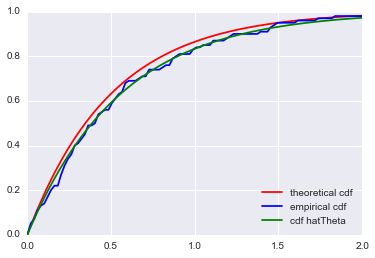

La norme infinie entre la cdf théorique et empirique vaut 0.0849
La norme infinie entre la cdf théorique et la cdf F_hatTheta vaut 0.0404


In [20]:
import numpy as np
from scipy.stats import expon
import matplotlib.pylab as plt
import mpld3
mpld3.enable_notebook()
%matplotlib inline
####param
n, theta = 100, 2
x = np.linspace(0,2,100)
#######empirical cdf
def cdf(sample, x):
    n = sample.size
    nb = sum(sample <= x)
    return nb/float(n)
sample = expon.rvs(size=n ,scale = 1/float(theta))
hatF = []
for ele in x:
    hatF.append(cdf(sample, ele))
########theoretical cdf
F = expon.cdf(x, loc = 0, scale = 1/float(theta))
##########F_{\hat\theta_n}
hatTheta = 1/float(np.mean(sample))
F_hatTheta = expon.cdf(x, loc = 0, scale = 1/float(hatTheta))
########Plot
plt.plot(x, F, 'r', label = 'theoretical cdf')
plt.plot(x, hatF, 'b', label = 'empirical cdf')
plt.plot(x, F_hatTheta, 'g', label = 'cdf hatTheta')
plt.legend(loc=4)
plt.show()
diff = [abs(a - b) for a, b in zip(F, hatF)]
print 'La norme infinie entre la cdf théorique et empirique vaut {}'.format("%.4f" % max(diff))
diff = [abs(a - b) for a, b in zip(F, F_hatTheta)]
print 'La norme infinie entre la cdf théorique et la cdf F_hatTheta vaut {}'.format("%.4f" % max(diff))